In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [4]:

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9385964912280702


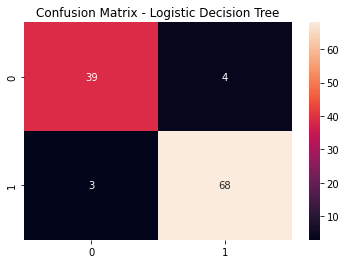

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_dtc = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dtc, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Decision Tree")
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)


Logistic Regression Accuracy: 0.9649122807017544


C:\Users\Tiago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


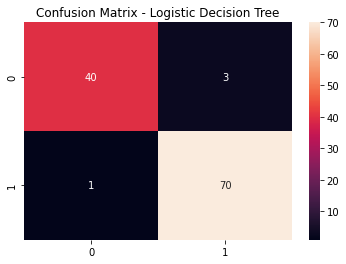

In [8]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Decision Tree")
plt.show()

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.956140350877193


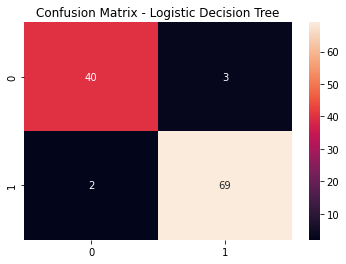

In [10]:
cm_rfc = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rfc, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Decision Tree")
plt.show()

In [11]:
#Exercicio dois
faulty = pd.read_csv('faults.csv')

In [13]:
faulty.isna().sum().sum()

0

In [14]:
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness','Bumps','Other_Faults']
faults_X = faulty.drop(targets, axis=1)
faults_y = faulty[targets]
X_train, X_test, y_train, y_test = train_test_split(faults_X, faults_y, test_size=0.2, random_state=42)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt


In [16]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

parameters = {
    'clf__max_depth': range(3,7),
    'clf__min_samples_split': range(3,7),
    'clf__min_samples_leaf': range(3,7)
}


In [17]:
grid_search = GridSearchCV(pipeline, parameters, cv=5)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


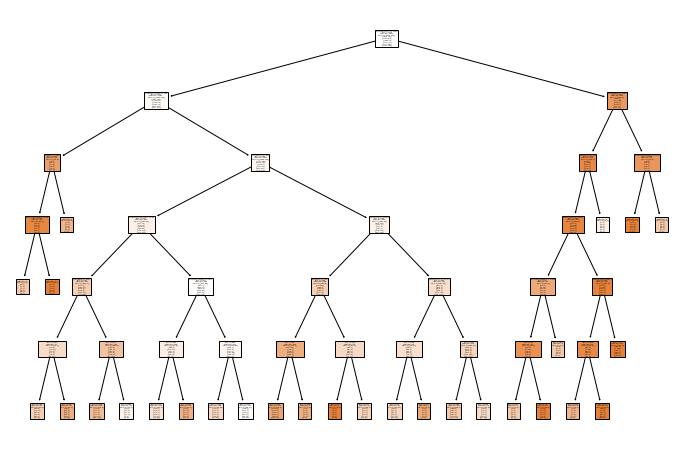

In [18]:
feature_names = X.columns

plt.figure(figsize=(12, 8))
tree.plot_tree(best_model.named_steps['clf'], feature_names=feature_names, class_names=best_model.named_steps['clf'].classes_, filled=True)
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
data = pd.read_csv("house_prices.csv")
#data = data.dropna(how='any')

X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

data.isna().sum()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the hyperparameters for grid search
parameters = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 3, 5]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_
# Evaluate the model on the test set
mse = mean_squared_error(y_test, best_model.predict(X_test))
print("Mean Squared Error:", mse)


In [45]:
data.isna().sum()

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64